CONTENTS:
1. ALL METHODS EXCEPT BOOSTERS
2. PARAMETER TUNING
3. BOOSTERS
4. DIAGRAMS OF ALL METHODS
5. FEATURE IMPORTANCE


In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import eli5
from eli5.sklearn import PermutationImportance
import tensorflow as tf
from tensorflow import keras
import keras
from keras import layers
from keras.models import Sequential
from keras import regularizers
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA

/opt/miniconda3/envs/CondaEnv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

data = pd.read_csv('features_30_sec.csv')
data = data.drop(["filename","length"], axis=1)
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

# pca = PCA(n_components=30)
# principalComponents = pca.fit_transform(X)
# X = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9', 'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23', 'pc 24', 'pc 25', 'pc 26', 'pc 27', 'pc 28', 'pc 29', 'pc 30'])

#### Standardize X ####
cols = X.columns
scaler = StandardScaler()
np_scaled = scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Transform Data for Sequantial NN and Boosters
le = LabelEncoder()
y_train2 = le.fit_transform(y_train)
y_val2 = le.fit_transform(y_val)
y_test2 =le.fit_transform(y_test)

In [7]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')
    return round(accuracy_score(y_test, preds), 5)

In [61]:
# Naive Bayes

nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=1)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
#lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
#model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=5.2631578947368424e-05, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

#BOOSTERS AT THE END


0.64375

In [13]:
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

Accuracy Decission trees : 0.425 



0.425

PARAMETER TUNING

NEURAL NETWORK

In [12]:
model = Sequential()
#add regularizer to prevent overfitting
model.add(layers.Dense(120, activation='relu', kernel_regularizer=regularizers.l2(1e-4), input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier = model.fit(X_train, y_train2, epochs=20, batch_size=64, validation_data=(X_val, y_val2))
nn_test_loss, nn_test_acc  = model.evaluate(X_test, y_test2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               5800      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
10/10 [==============================] - 1s 41ms/step - loss: 2.5123 - accuracy: 0.1047 - val_loss: 2.2943 - val_accuracy: 0.0938
Epoch 2/200
10/10 [==============================] - 0s 30ms/step - loss: 2.2284 - accuracy: 0.1516 - val_loss: 2.0419 - val_accuracy: 0.2000
Epoch 3/200
10/10 [========

<Figure size 2000x1500 with 0 Axes>

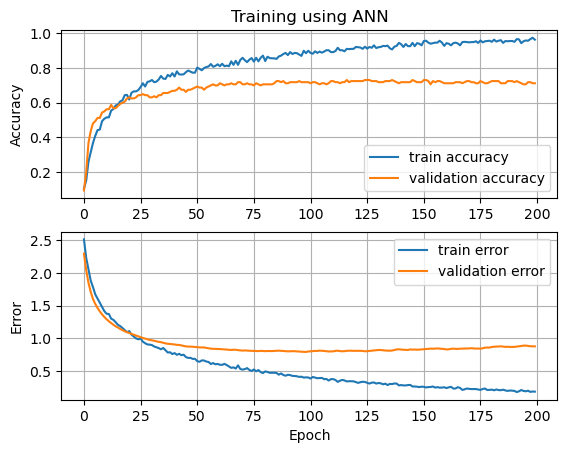

In [13]:
def plot_history(hist):
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Training using ANN")
    axs[0].grid()

    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].grid()

    plt.show()


plot_history(classifier)



KNN

In [8]:
# With tuned parameter
knn = KNeighborsClassifier(n_neighbors=1)
knn_accuracy_score = model_assess(knn, "KNN")

Accuracy KNN : 0.62 



Random Forest

In [11]:
# With tuned parameters
rforest = RandomForestClassifier(n_estimators=2001, max_depth=21, random_state=0)
rf_accuracy_score = model_assess(rforest, "Random Forest")

Accuracy Random Forest : 0.685 



Support Vector Machine

In [12]:
svm = SVC(decision_function_shape="ovo")
svc_accuracy = model_assess(svm, "Support Vector Machine")


Accuracy Support Vector Machine : 0.665 



Neural Nets

Cross Gradient Booster

In [ ]:
best_cgb = [1,0.01]
best_score_cgb = 0
for est in tqdm(range(1000,2000,100)):
    for lr in np.linspace(0.1,0.7,7):
        xgb = XGBClassifier(n_estimators=est, learning_rate=lr)
        # model_assess(xgb, "Cross Gradient Booster")
        xgb.fit(X_train, y_train2)
        preds = xgb.predict(X_test)
        #print(confusion_matrix(y_test, preds))
        print('Accuracy', "Cross Gradient Booster", ':', round(accuracy_score(y_test2, preds), 5), '\n')
        if round(accuracy_score(y_test2, preds), 5) > best_score_cgb:
            best_score_cgb = round(accuracy_score(y_test2, preds), 5)
            best_cgb = [est, lr]

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy Cross Gradient Booster : 0.63333 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.59333 



 10%|█         | 1/10 [00:38<05:46, 38.45s/it]

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.64 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.59667 



 20%|██        | 2/10 [01:20<05:22, 40.31s/it]

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.64667 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.59667 



 30%|███       | 3/10 [02:04<04:55, 42.25s/it]

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.64667 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.59667 



 40%|████      | 4/10 [02:50<04:23, 43.86s/it]

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.64667 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.59667 



 50%|█████     | 5/10 [03:39<03:48, 45.60s/it]

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.65 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.6 



 60%|██████    | 6/10 [04:31<03:11, 47.87s/it]

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.65 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.6 



 70%|███████   | 7/10 [05:25<02:29, 49.82s/it]

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.65333 

Accuracy Cross Gradient Booster : 0.62 

Accuracy Cross Gradient Booster : 0.61 

Accuracy Cross Gradient Booster : 0.61333 

Accuracy Cross Gradient Booster : 0.62333 

Accuracy Cross Gradient Booster : 0.6 



 80%|████████  | 8/10 [06:21<01:43, 51.69s/it]

Accuracy Cross Gradient Booster : 0.61667 

Accuracy Cross Gradient Booster : 0.65333 



In [14]:
xgb = XGBClassifier(n_estimators=1200, learning_rate=0.3)
xgb.fit(X_train, y_train2)
preds = xgb.predict(X_test)
xgb_acc = round(accuracy_score(y_test2, preds))
print('Accuracy', "Cross Gradient Booster", ':', round(accuracy_score(y_test2, preds), 5), '\n')

Accuracy Cross Gradient Booster : 0.68 



Cross Gradient Booster (Random Forest)

In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=xgb, random_state=1)
perm.fit(X_test, y_test2)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0893 ± 0.0129,perceptr_var
0.0727 ± 0.0122,chroma_stft_mean
0.0507 ± 0.0160,chroma_stft_var
0.0393 ± 0.0107,mfcc4_mean
0.0353 ± 0.0172,mfcc9_mean
0.0340 ± 0.0212,spectral_centroid_var
0.0313 ± 0.0161,mfcc17_mean
0.0287 ± 0.0137,mfcc5_var
0.0273 ± 0.0098,harmony_mean
0.0253 ± 0.0090,mfcc14_mean


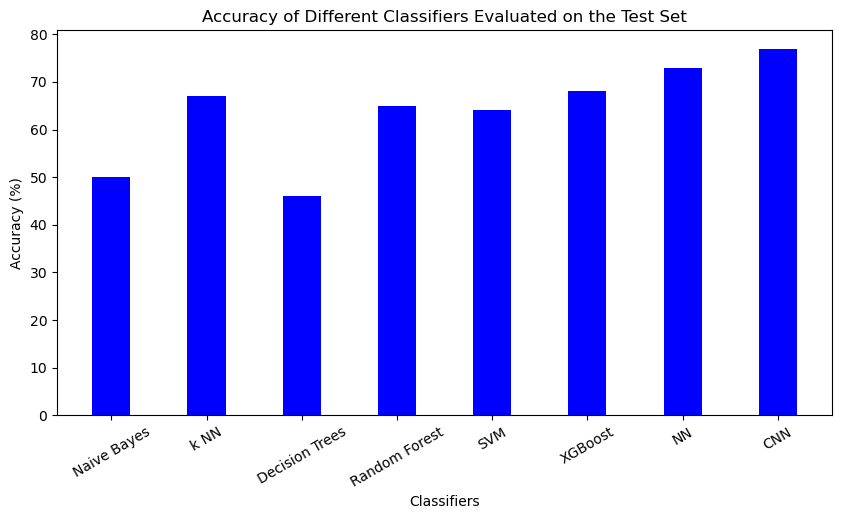

In [88]:
import matplotlib.pyplot as plt
data = {'Naive Bayes': 50,  'k NN':67,'Decision Trees':46, 'Random Forest':65, 'SVM':64, 'XGBoost':68, 'ANN':73, 'CNN':77}
classifiers = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(classifiers, values, color ='blue',
        width = 0.4)
plt.xticks(fontsize=10, rotation=30)


plt.xlabel("Classifiers")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Different Classifiers Evaluated on the Test Set")
plt.show()

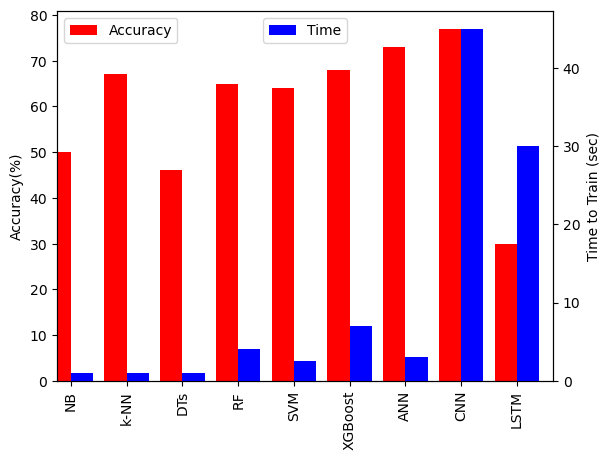

In [31]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO("""     Accuracy     Time
NB     50   1
k-NN     67   1
DTs    46  1
RF    65  4
SVM    64  2.5
XGBoost    68  7
ANN     73   3
CNN     77   45
LSTM    30   30
""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.Accuracy.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='Accuracy')
df.Time.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label='Time')

ax.set_ylabel('Accuracy(%)')
ax2.set_ylabel('Time to Train (sec)')
ax.legend(loc='upper left')
ax2.legend(loc='upper center')

plt.show()